In [15]:
from pymongo import MongoClient
import pandas as pd 
import numpy as np

%matplotlib inline

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import Normalizer, FunctionTransformer
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [2]:
client = MongoClient()
db = client['toxic_articles']
articles = list(db.articles.find({}))

In [3]:
articles_df = pd.DataFrame(articles)

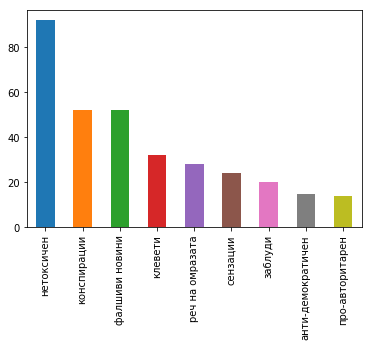

In [4]:
articles_df['label'].value_counts().plot(kind='bar')

In [10]:
print(articles_df.shape)
print('avg text len', np.average(articles_df['text'].str.len()))
print('avg title len', np.average(articles_df['title'].str.len()))

(329, 12)
avg text len 3104.2492401215804
avg title len 66.66565349544074


In [43]:
def make_clf():
    return Pipeline([
        ('feats', FeatureUnion([
            ('lsa_title', Pipeline([
                ('selector', FunctionTransformer(lambda x: x['title'].tolist(), validate=False)),
                ('tfidf', TfidfVectorizer()),
                ('dim_red', TruncatedSVD(10))
            ])),
            ('lsa_text', Pipeline([
                ('selector', FunctionTransformer(lambda x: x['text'].tolist(), validate=False)),
                ('tfidf', TfidfVectorizer()),
                ('dim_red', TruncatedSVD(300))
            ])),
            
        ])),
        ('clf', LogisticRegression(multi_class='auto', solver='lbfgs'))
    ])

In [44]:
np.average(cross_val_score(make_clf(), articles_df, articles_df['label'], cv=5, scoring='accuracy'))

0.40425117776099545

In [22]:
articles_df.head()

,_id,authors,keywords,label,link,media_info,origin,publish_date,summary,tags,text,title
0,5cab3aefb7ddb24c08a4a1c5,[],"[и, в, е, япония, броколи, от, осиновиха, испа...",фалшиви новини,https://www.vesti.bg/lyubopitno/sveji/vegani-o...,"{'editor': '', 'responsible_person': '', 'esta...",www.vesti.bg,NaT,И спанска двойка от Севиля - Марио Бостес и Ир...,[],И спанска двойка от Севиля - Марио Бостес и Ир...,Вегани осиновиха броколи в Испания - Любопитно
1,5cab3af0b7ddb24c08a4a1c6,[],"[клати, перука, скандална, лозан, радан, крист...",фалшиви новини,https://www.blitz.bg/analizi-i-komentari/skand...,"{'editor': '', 'responsible_person': '', 'esta...",www.blitz.bg,NaT,А после си правят селфита на гениталиите и ги ...,[],Бойко обича жените. Радан обича мъжете. Това е...,Скандална гей дружина клати България! Стига ве...
2,5cab3af1b7ddb24c08a4a1c7,[],"[и, в, на, им, е, се, от, генов, блъсков, плащ...",клевети,https://www.blitz.bg/obshtestvo/blskov-na-prot...,"{'editor': '', 'responsible_person': '', 'esta...",www.blitz.bg,NaT,Това каза медийният собственик Петьо Блъсков в...,[],"Протестите повече попречиха на хората, отколко...",Блъсков: На протестърите им бе плащано и това ...
3,5cab3af2b7ddb24c08a4a1c8,[],"[събрание, в, на, е, отказите, ход, от, се, ра...",заблуди,https://www.blitz.bg/politika/tsik-obyavyava-g...,"{'editor': '', 'responsible_person': '', 'esta...",www.blitz.bg,NaT,Очаква се днес Централната избирателна комисия...,"[румен радев, кабинет, цик, депутати, парламент]",Очаква се днес Централната избирателна комисия...,"ЦИК обявява голяма новина, на ход е Радев!"
4,5cab3af2b7ddb24c08a4a1c9,[],"[маринова, на, само, топ, виктория, бъде, от, ...",реч на омразата,https://www.24chasa.bg/mnenia/article/7090368,"{'editor': 'Борислав Зюмбюлев', 'responsible_p...",www.24chasa.bg,NaT,Певицата Били Айлиш оглави престижната класаци...,[],Певицата Били Айлиш оглави престижната класаци...,Виктория Маринова не трябва да бъде забравена
